# Human numbers

In [1]:
#!pip3 install torch_nightly -f https://download.pytorch.org/whl/nightly/cu92/torch_nightly.html
#!pip3 install fastai --user

In [31]:
!pip3 install fastai==1.0.61

In [32]:
from fastai.text import *
#from fastai.text.all import *

In [33]:
bs=64

## Data

In [1]:
import pandas as pd
import numpy as np

In [2]:

dbpedia_df = pd.read_json('datasets/DBpedia/smarttask_dbpedia_train.json')

In [3]:
test_df= pd.read_json('datasets/DBpedia/smarttask_dbpedia_test_questions.json')

In [4]:
test_df.head()

,id,question
0,dbpedia_16015,How many ingredients are in the grain} ?
1,dbpedia_3885,Is the case fatality rate of Fournier gangrene...
2,dbpedia_12907,Does the shelf life of spinach equal 8?
3,dbpedia_7955,What sound does a pig make in the French langu...
4,dbpedia_2376,When was Fergie completed his record label in ...


In [9]:
#vq_test_df= pd.read_json('data/VQUANDA_train.json')

In [10]:
#vq_test_df.head()

In [11]:
answer_types = {}
for answers in dbpedia_df.type:
    for a in answers:
        if a in answer_types:
            answer_types[a]+=1
        else:
            answer_types[a]=1

def multitype_to_freqtype(type_list):
    for t in sorted_types:
        if t in type_list:
            return t

def types_to_spec_type(type_list):
    if len(type_list) == 0:
      return None 
    return type_list[0]
            
answ_df =pd.DataFrame.from_dict(answer_types, orient='index', columns=['Freq'])
sorted_types = answ_df.sort_values(by='Freq', ascending=False).index
dbpedia_df['single_type'] =dbpedia_df.type.apply(multitype_to_freqtype)
dbpedia_df['specific_type'] =dbpedia_df.type.apply(types_to_spec_type)

In [12]:
dbpedia_df= dbpedia_df[dbpedia_df.category.notna()]

In [13]:
dbpedia_df[dbpedia_df['question'].isna()]

,id,question,category,type,single_type,specific_type
242,dbpedia_7042,None,literal,[date],date,date
443,dbpedia_16956,None,resource,"[dbo:Village, dbo:Settlement, dbo:PopulatedPla...",dbo:Place,dbo:Village
497,dbpedia_15803,None,literal,[date],date,date
775,dbpedia_440,None,literal,[date],date,date
1295,dbpedia_11926,None,literal,[date],date,date
1740,dbpedia_13826,None,literal,[date],date,date
2133,dbpedia_15458,None,literal,[date],date,date
2195,dbpedia_17058,None,literal,[date],date,date
2459,dbpedia_3072,None,resource,"[dbo:Village, dbo:Settlement, dbo:PopulatedPla...",dbo:Place,dbo:Village
2584,dbpedia_95,None,literal,[date],date,date


In [14]:
dbpedia_df[dbpedia_df['single_type'].isna()]

,id,question,category,type,single_type,specific_type
372,dbpedia_23441,In which time zone is Rome?,resource,[],None,None
724,dbpedia_23334,Give me all breeds of the German Shepherd dog.,resource,[],None,None
1091,dbpedia_23283,Where is the residence of the prime minister o...,resource,[],None,None
2398,dbpedia_23022,Which frequent flyer program has the most airl...,resource,[],None,None
5146,dbpedia_23526,What form of government does Russia have?,resource,[],None,None
6653,dbpedia_23146,Show me hiking trails in the Grand Canyon wher...,resource,[],None,None
7690,dbpedia_23152,Which instruments does Cat Stevens play?,resource,[],None,None
9476,dbpedia_23094,Whom did Lance Bass marry?,resource,[],None,None
10025,dbpedia_23514,What is the timezone in San Pedro de Atacama?,resource,[],None,None
10637,dbpedia_23494,Who designed the Brooklyn Bridge?,resource,[],None,None


In [15]:
dbpedia_df= dbpedia_df[dbpedia_df['single_type'].notna()]

In [16]:
dbpedia_df.dropna( subset=['question'], inplace=True)

In [17]:
dbpedia_df.head()

,id,question,category,type,single_type,specific_type
0,dbpedia_1177,Was Jacqueline Kennedy Onassis a follower of M...,boolean,[boolean],boolean,boolean
1,dbpedia_14427,What is the name of the opera based on Twelfth...,resource,"[dbo:Opera, dbo:MusicalWork, dbo:Work]",dbo:Work,dbo:Opera
2,dbpedia_16615,When did Lena Horne receive the Grammy Award f...,literal,[date],date,date
3,dbpedia_23480,Do Prince Harry and Prince William have the sa...,boolean,[boolean],boolean,boolean
4,dbpedia_3681,What is the subsidiary company working for Leo...,resource,"[dbo:EducationalInstitution, dbo:Organisation,...",dbo:Agent,dbo:EducationalInstitution


In [18]:
dbpedia_df[dbpedia_df.category=='literal']

,id,question,category,type,single_type,specific_type
2,dbpedia_16615,When did Lena Horne receive the Grammy Award f...,literal,[date],date,date
5,dbpedia_14897,Which is the hierarchical BrainInfo ID of the ...,literal,[string],string,string
8,dbpedia_3712,what is the musical composer id of bedrish sme...,literal,[string],string,string
10,dbpedia_14847,How often are the Paralympic games held?,literal,[number],number,number
18,dbpedia_6806,In what year did Tim Hunt give a Croonian Lect...,literal,[date],date,date
...,...,...,...,...,...,...
17553,dbpedia_141,What is Bandysidan player ID for Sergey Lomanov ?,literal,[string],string,string
17558,dbpedia_3605,What is the total fertility rate for operators...,literal,[number],number,number
17560,dbpedia_6823,What is long lives in John Keats ?,literal,[number],number,number
17561,dbpedia_10069,Who is the employer of the {Hans Krebs} ?,literal,[number],number,number


In [19]:
def extend_cat(row):
  if row['category'] =='boolean':
    return row['category']
  elif row['category'] == 'literal':
    return row['single_type']
  else:
    return row['category']


In [20]:
dbpedia_df['extended_cat'] = dbpedia_df.apply(extend_cat, axis=1)

In [96]:
VALIDATION_SPLIT = 0.2
indicies = np.arange(dbpedia_df.shape[0])
np.random.shuffle(indicies)
num_valid_samples = int(VALIDATION_SPLIT * dbpedia_df.shape[0])
num_valid_samples

3502

In [97]:
num_test_samples=  int(num_valid_samples/2)

In [98]:
dbpedia_df=dbpedia_df.iloc[indicies]

In [99]:
train_df= dbpedia_df[:-num_valid_samples]
train_df.head()

,id,question,category,type,single_type,specific_type,extended_cat
2592,dbpedia_6746,What date did Richard Attenborough marry Sheil...,literal,[date],date,date,date
12092,dbpedia_15139,In what year was Do the Right Thing nominated ...,literal,[date],date,date,date
3153,dbpedia_7534,Who influenced Roald Dahl's career?,resource,"[dbo:Profession, dbo:PersonFunction]",dbo:PersonFunction,dbo:Profession,resource
9024,dbpedia_5525,What is the location of death of Antonio Canov...,resource,"[dbo:City, dbo:Settlement, dbo:PopulatedPlace,...",dbo:Place,dbo:City,resource
13986,dbpedia_18202,Which animator of Tommy Ticker's Tooth is also...,resource,"[dbo:Person, dbo:Agent]",dbo:Agent,dbo:Person,resource


In [100]:
valid_df= dbpedia_df[-num_valid_samples:]
valid_df.head()

,id,question,category,type,single_type,specific_type,extended_cat
13794,dbpedia_6046,Is labetalol and piretanide used as a drug to ...,boolean,[boolean],boolean,boolean,boolean
364,dbpedia_8196,Which is the literature work that had Hebrew a...,resource,[dbo:Work],dbo:Work,dbo:Work,resource
5678,dbpedia_13125,Of all the unitary states which are members of...,resource,"[dbo:Country, dbo:State, dbo:PopulatedPlace, d...",dbo:Place,dbo:Country,resource
12352,dbpedia_19587,Where was the company who is the operator of H...,resource,"[dbo:City, dbo:Settlement, dbo:PopulatedPlace,...",dbo:Place,dbo:City,resource
2764,dbpedia_3798,What is route map of Milan Metro?,literal,[string],string,string,string


In [101]:
len(valid_df)

3502

In [102]:
valid_df.to_csv('datasets/dbpedia_valid_gold.csv', index=False)

In [27]:
#test_df= dbpedia_df[-num_test_samples:]
#test_df.head()

In [28]:
len(valid_df)

3502

## Maintain state

## LSTM

In [29]:
len(valid_df)

3502

In [34]:
categories = list(dbpedia_df.extended_cat.unique())
data_cat = TextDataBunch.from_df('tmp', train_df=train_df,  valid_df=valid_df, test_df=test_df, text_cols=['question'], label_cols=['extended_cat'], classes=categories)

In [35]:
data_cat.show_batch()

/usr/local/lib/python3.6/dist-packages/fastai/text/data.py:339: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:766.)
  idx_min = (t != self.pad_idx).nonzero().min()


text,target
"xxbos xxmaj sovereignty has taken on a different meaning with the development of the principle of self - determination and the xxunk against the xxunk or use of force as xxunk xxunk xxunk of modern international law . xxmaj the xxmaj united xxmaj nations xxmaj xxunk , the xxmaj draft xxmaj declaration on xxmaj rights and xxmaj duties of xxmaj states , and the xxunk of regional international organizations express",resource
"xxbos xxmaj xxunk xxmaj nandala xxmaj mafabi is a xxmaj xxunk accountant , lawyer , and politician . xxmaj he represents ... xxmaj nandala xxmaj mafabi . xxmaj from xxmaj wikipedia , the free encyclopedia . xxmaj jump to xxunk xxmaj jump to xxunk . xxmaj nandala xxmaj mafabi ... xxmaj residence , xxmaj kampala , xxmaj uganda . xxmaj nationality ... \n xxmaj missing : { ocean }",resource
xxbos xxmaj was xxmaj hunter xxup s. xxmaj thompson in xxmaj xxunk 's xxmaj angels : xxmaj the xxmaj strange and xxmaj terrible xxmaj saga of the xxmaj xxunk xxmaj motorcycle xxmaj xxunk and xxmaj the xxmaj kentucky xxmaj xxunk is xxmaj xxunk and xxmaj depraved ?,boolean
xxbos which is the { point in time } for { xxmaj kelly xxmaj xxunk } that has { nominated for } as { xxmaj daytime xxmaj emmy xxmaj award for xxmaj outstanding xxmaj talk xxmaj show xxmaj host } ?,date
xxbos xxmaj was the significant event of xxmaj augusto xxmaj pinochet his xxunk and xxunk and the xxup r. v xxmaj xxunk xxmaj street xxmaj metropolitan xxmaj xxunk xxmaj magistrate xxmaj xxunk xxmaj xxunk xxmaj pinochet xxmaj xxunk ?,boolean


In [36]:
cls1 = text_classifier_learner(data_cat, AWD_LSTM, bptt=10)
cls1.lr_find()




epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


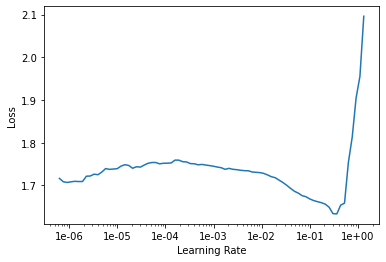

In [37]:
cls1.recorder.plot() 

In [38]:
cls1.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))
#cls1.save('dbpedia_fit_head')

epoch,train_loss,valid_loss,accuracy,time
0,1.329166,1.296423,0.545403,00:06


In [39]:
#cls1.load('dbpedia_fit_head')
cls1.unfreeze()
cls1.fit_one_cycle(5, 1e-3, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.684678,0.506903,0.850086,00:12
1,0.382696,0.343408,0.914049,00:11
2,0.277832,0.221281,0.942319,00:12
3,0.183297,0.202202,0.943461,00:11
4,0.160159,0.195942,0.946316,00:11


In [40]:
cls1.unfreeze()
cls1.fit_one_cycle(5, 1e-3, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.163769,0.229736,0.947173,00:12
1,0.209158,0.324305,0.915477,00:12
2,0.165535,0.210553,0.941748,00:11
3,0.121317,0.226867,0.938035,00:11
4,0.090068,0.218624,0.943461,00:12


In [41]:
cls1.save_encoder('models/dbpedia_cat_fit_c5')

In [42]:
cls1.load_encoder('models/dbpedia_cat_fit_c5')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (14010 items)
x: TextList
xxbos xxmaj list the magazines published by xxmaj xxunk xxmaj enterprises ?,xxbos xxmaj what has been founded in the state that xxmaj denton county , xxmaj texas is a part of ? xxunk,xxbos xxmaj is it true that the electorate of xxmaj del xxmaj carmen is greater than xxunk ?,xxbos xxmaj was 12th xxmaj field xxmaj artillery xxmaj regiment garrisoned at colorado ?,xxbos xxmaj is it true that the admission rate of the xxmaj massachusetts xxmaj institute of xxmaj technology equals to 0.08 ?
y: CategoryList
resource,resource,boolean,boolean,boolean
Path: tmp;

Valid: LabelList (3502 items)
x: TextList
xxbos xxmaj when was the city of xxmaj xxunk founded ?,xxbos xxmaj which scientist is known for the xxmaj manhattan xxmaj project and the xxmaj nobel xxmaj peace xxmaj prize ?,xxbos xxmaj in which city of xxmaj xxunk xxmaj xxunk was the xxmaj congress of xxmaj xxunk xxmaj organization founded ?,xxbos xxmaj which air

In [43]:
len(test_df)

4381

In [44]:
valid_df.head()

,id,question,category,type,single_type,specific_type,extended_cat
1781,dbpedia_4772,When was the city of Frankfurt founded ?,literal,[date],date,date,date
1457,dbpedia_23475,Which scientist is known for the Manhattan Pro...,resource,"[dbo:Scientist, dbo:Person, dbo:Agent]",dbo:Agent,dbo:Scientist,resource
16326,dbpedia_22151,In which city of Pittsburg Steelers was the Co...,resource,"[dbo:City, dbo:Settlement, dbo:PopulatedPlace,...",dbo:Place,dbo:City,resource
1940,dbpedia_23173,Which airports does Air China serve?,resource,"[dbo:Airport, dbo:Infrastructure, dbo:Architec...",dbo:Place,dbo:Airport,resource
1744,dbpedia_16586,Who was Innocent III's first cousin once remov...,resource,"[dbo:Person, dbo:Agent]",dbo:Agent,dbo:Person,resource


In [46]:
classes_t=[]
for i,row in test_df.sample(5).iterrows():
  p_ = cls1.predict(row['question'])
  #print (p_)
  #va = row['verbalized_answer']
  #s = va.find('[')
  #e = va.find(']')
  # ans =va[s:e+1]
  cls = int(p_[1])
  prob= p_[2]
  print (row['question'], '\n',':',categories[cls] )
  print ('Prob:',prob[cls])
  input('press for next')

What is the location in or next to body of water and time zone of Nice? 
 : resource
Prob: tensor(0.9990)
press for next1
Which mountains are contained in Inyo National Forest? 
 : resource
Prob: tensor(0.9957)
press for next1
Is it true that the total assets of the HHLA equals 1812900000? 
 : boolean
Prob: tensor(0.9999)
press for next1
Is the duration of 666 less than .8? 
 : boolean
Prob: tensor(0.9998)
press for next1
Did Tom Selleck play sports for the USA? 
 : boolean
Prob: tensor(0.9993)
press for next1


In [47]:
data_cat.add_test(test_df)

In [103]:
predictions, *_  = cls1.get_preds(DatasetType.Valid)
labels = np.argmax(predictions, 1)
valid_df['cat_pred'] = labels
valid_df.cat_pred= valid_df.cat_pred.replace({ i:c for i,c in enumerate(categories)})
valid_df.sample(10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,id,question,category,type,single_type,specific_type,extended_cat,cat_pred
11518,dbpedia_2155,Who began the International Olympic Committee?,resource,"[dbo:Person, dbo:Agent]",dbo:Agent,dbo:Person,resource,resource
8061,dbpedia_3075,What is Dewey Decimal Classification for Canto...,literal,[string],string,string,string,boolean
5997,dbpedia_3773,Which is the WSJ topic ID for Al Sharpton?,literal,[string],string,string,string,resource
10287,dbpedia_17493,n/a,resource,"[dbo:Country, dbo:State, dbo:PopulatedPlace, d...",dbo:Place,dbo:Country,resource,resource
12304,dbpedia_12867,What are the ice honey team which start with t...,resource,"[dbo:HockeyTeam, dbo:SportsTeam, dbo:Organisat...",dbo:Agent,dbo:HockeyTeam,resource,resource
8606,dbpedia_8703,Who composed the Star-Spangled Banner ?,resource,"[dbo:Person, dbo:Agent]",dbo:Agent,dbo:Person,resource,boolean
5103,dbpedia_22015,Tell me the name of the Prime Time Entertainme...,resource,"[dbo:TelevisionShow, dbo:Work]",dbo:Work,dbo:TelevisionShow,resource,resource
15301,dbpedia_557,When did Shivaji and Sakavaarbai become married?,literal,[date],date,date,date,boolean
5958,dbpedia_825,what is the {represents} for {North Atlantic T...,resource,"[dbo:Organisation, dbo:Agent]",dbo:Agent,dbo:Organisation,resource,resource
10119,dbpedia_20492,Which content license of the MSX BASIC is also...,resource,"[dbo:Company, dbo:Organisation, dbo:Agent]",dbo:Agent,dbo:Company,resource,date


In [48]:
predictions, *_  = cls1.get_preds(DatasetType.Test)
labels = np.argmax(predictions, 1)

In [49]:
labels= labels.numpy()

In [50]:
cls1.show_results(ds_type=DatasetType.Valid)

text,target,prediction
"xxbos xxmaj in xxunk the xxunk family xxunk to 2 xxmaj xxunk xxmaj street , xxmaj xxunk , from which xxmaj william xxunk rented part of the xxunk of xxmaj xxunk xxmaj house . xxmaj there he xxunk flowers in which his family were xxunk to take an interest , the origin of xxmaj xxunk 's life - long interest in botanical forms as a subject matter for the xxunk",string,resource
"xxbos xxmaj the death of xxmaj xxunk was xxunk depicted in a much - xxunk xxunk xxmaj xxunk and xxmaj his xxmaj sons , xxunk by xxmaj xxunk the xxmaj elder to the xxmaj xxunk sculptors xxmaj xxunk , xxmaj xxunk , and xxmaj xxunk , which xxunk in the xxmaj xxunk xxmaj xxunk , xxmaj rome . ... song "" xxmaj xxunk "" xxunk xxmaj xxunk , xxunk him",number,resource
xxbos xxmaj which family member of xxmaj xxunk xxmaj xxunk is a writer by profession ? \n \n xxmaj name the family member of xxmaj xxunk xxmaj xxunk who is a writer by profession . \n \n xxmaj which of xxmaj xxunk xxmaj xxunk 's relatives has a career in writing ? \n \n xxmaj who is the relative of xxmaj xxunk xxmaj xxunk who has a,resource,resource
xxbos xxmaj did { xxunk } was { nominated for } { xxmaj primetime xxmaj emmy xxmaj award for xxmaj outstanding xxmaj supporting xxmaj actress in a xxmaj drama xxmaj series } and { xxmaj primetime xxmaj emmy xxmaj award for xxmaj outstanding xxmaj lead xxmaj actress in a xxmaj miniseries or a xxmaj movie } ?,boolean,boolean
xxbos xxup which xxup is xxup the xxup specialist xxup of xxup the xxup part xxup of xxup work xxup of xxup xxunk xxup of xxup quantum xxup xxunk xxup xxunk xxup with a xxup blood xxup flow xxup limited xxup xxunk xxup based xxup xxunk xxup model ?,resource,resource


In [51]:
test_df['cat_pred'] = labels
test_df.cat_pred= test_df.cat_pred.replace({ i:c for i,c in enumerate(categories)})

In [52]:
categories

['resource', 'boolean', 'number', 'string', 'date']

In [53]:
test_df.sample(10)

,id,question,cat_pred
175,dbpedia_15955,When did Rowan Atkinson attend the Queen's Col...,date
2886,dbpedia_10493,Which is {terminating connection location} of ...,resource
705,dbpedia_18449,What are the television shows whose distributo...,resource
693,dbpedia_17455,What is the name of a film located in Montreal?,resource
3088,dbpedia_21273,Does Jean Louis Arcand work for Geneva?,boolean
3257,dbpedia_18918,Who all are buried in Arlington national cemen...,resource
151,dbpedia_20082,What is the common debut team of the Butch Met...,resource
2420,dbpedia_8792,Which is the JMDb film ID for Nausicaä of the ...,string
3861,dbpedia_17132,Which is the monomer of polyvinyl chloride?,resource
2211,dbpedia_16796,When was Isaac stern completed his education a...,date


## Most frequent/generic type prediction

In [54]:
len(dbpedia_df.single_type.unique())

47

In [55]:
train_df= train_df[train_df.category =='resource']
valid_df= valid_df[valid_df.category =='resource']

In [56]:
len(train_df), len(valid_df)

(7647, 1910)

In [57]:
train_df['ques_cat'] = train_df.question + ' dbo:'+train_df.extended_cat
valid_df['ques_cat'] = valid_df.question + ' dbo:'+valid_df.extended_cat

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [58]:
valid_df.head()

,id,question,category,type,single_type,specific_type,extended_cat,ques_cat
1457,dbpedia_23475,Which scientist is known for the Manhattan Pro...,resource,"[dbo:Scientist, dbo:Person, dbo:Agent]",dbo:Agent,dbo:Scientist,resource,Which scientist is known for the Manhattan Pro...
16326,dbpedia_22151,In which city of Pittsburg Steelers was the Co...,resource,"[dbo:City, dbo:Settlement, dbo:PopulatedPlace,...",dbo:Place,dbo:City,resource,In which city of Pittsburg Steelers was the Co...
1940,dbpedia_23173,Which airports does Air China serve?,resource,"[dbo:Airport, dbo:Infrastructure, dbo:Architec...",dbo:Place,dbo:Airport,resource,Which airports does Air China serve? dbo:resource
1744,dbpedia_16586,Who was Innocent III's first cousin once remov...,resource,"[dbo:Person, dbo:Agent]",dbo:Agent,dbo:Person,resource,Who was Innocent III's first cousin once remov...
16707,dbpedia_20015,Who are the founders of Iskra ?,resource,"[dbo:Person, dbo:Agent]",dbo:Agent,dbo:Person,resource,Who are the founders of Iskra ? dbo:resource


In [59]:
types = list(dbpedia_df.single_type.unique())
data_cls = TextDataBunch.from_df('tmp', train_df=train_df,  valid_df=valid_df, text_cols=['ques_cat'], label_cols=['single_type'], classes=types)

In [60]:
cls2 = text_classifier_learner(data_cls, AWD_LSTM, bptt=10)
cls2.lr_find()


epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


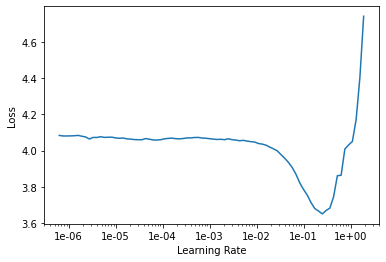

In [61]:
cls2.recorder.plot()

In [62]:
cls2.fit_one_cycle(3, 1e-1, moms=(0.8,0.7))
#cls2.save('dbpedia_type_fit_head')

epoch,train_loss,valid_loss,accuracy,time
0,2.115203,1.967345,0.427749,00:03
1,1.983128,1.948670,0.427749,00:03
2,1.911806,1.934409,0.427749,00:03


In [63]:
#cls2.load('dbpedia_type_fit_head')
cls2.unfreeze()
cls2.fit_one_cycle(10, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,1.774482,1.950551,0.504188,00:07
1,1.419451,1.444095,0.646597,00:07
2,1.240897,1.761017,0.646597,00:07
3,1.096238,1.196488,0.695812,00:07
4,0.983128,1.394360,0.668063,00:07
5,0.900591,1.105428,0.712042,00:07
6,0.821659,1.125803,0.723037,00:07
7,0.765875,1.776744,0.728272,00:07
8,0.697750,1.097815,0.732984,00:07
9,0.674912,1.118801,0.726702,00:07


In [ ]:
#cls2.save('dbpedia_type_fit_c5')

In [65]:
#cls2.load('dbpedia_type_fit_c5')
cls2.unfreeze()
cls2.fit_one_cycle(5, 1e-3, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.641408,1.117572,0.734031,00:07
1,0.623091,1.118303,0.736126,00:07
2,0.626866,1.119956,0.737696,00:07
3,0.651271,1.117572,0.740838,00:07
4,0.591740,1.236693,0.736126,00:07


In [66]:
#cls2.save_encoder('/models/dbpedia_resource_type_fit_c15')

In [67]:
cls2.show_results(ds_type=DatasetType.Valid)

text,target,prediction
xxbos xxmaj which family member of xxmaj xxunk xxmaj xxunk is a writer by profession ? \n \n xxmaj name the family member of xxmaj xxunk xxmaj xxunk who is a writer by profession . \n \n xxmaj which of xxmaj xxunk xxmaj xxunk 's relatives has a career in writing ? \n \n xxmaj who is the relative of xxmaj xxunk xxmaj xxunk who has a,dbo:Agent,dbo:Agent
xxbos xxup which xxup is xxup the xxup specialist xxup of xxup the xxup part xxup of xxup work xxup of xxup xxunk xxup of xxup quantum xxup xxunk xxup xxunk xxup with a xxup xxunk xxup flow xxup limited xxup xxunk xxup based xxup xxunk xxup model ? dbo : resource,dbo:TopicalConcept,dbo:Agent
xxbos xxmaj what is the { excipient with the lowest xxunk xxunk whose safety classification and labelling is xxup nfpa 704 : xxmaj standard xxmaj system for the xxmaj identification of the xxmaj hazards of xxmaj materials for xxmaj emergency xxmaj response ? dbo : resource,dbo:ChemicalSubstance,dbo:ChemicalSubstance
xxbos xxmaj what is the excipient with the highest xxunk xxunk whose safety classification and labelling is xxup nfpa 704 : xxmaj standard xxmaj system for the xxmaj identification of the xxmaj hazards of xxmaj materials for xxmaj emergency xxmaj response ? dbo : resource,dbo:ChemicalSubstance,dbo:ChemicalSubstance
xxbos who is the { elected in } for { xxmaj david xxmaj lloyd xxmaj george } that has { position held } as { xxmaj member of the xxunk xxmaj parliament of the xxmaj united xxmaj kingdom } ? dbo : resource,dbo:Event,dbo:Agent


In [68]:
test_df.head()

,id,question,cat_pred
0,dbpedia_16015,How many ingredients are in the grain} ?,number
1,dbpedia_3885,Is the case fatality rate of Fournier gangrene...,boolean
2,dbpedia_12907,Does the shelf life of spinach equal 8?,boolean
3,dbpedia_7955,What sound does a pig make in the French langu...,resource
4,dbpedia_2376,When was Fergie completed his record label in ...,date


In [167]:
test_res_df = test_df[test_df.cat_pred == 'resource']
#test_res_df = valid_df[valid_df.cat_pred == 'resource']
test_res_df['ques_cat'] = test_res_df.question + ' dbo:'+test_res_df.cat_pred


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [168]:
data_cls.add_test(test_res_df)

In [169]:
type_preds, *_  = cls2.get_preds(DatasetType.Test)
type_labels = np.argmax(type_preds, 1)

In [170]:
test_res_df.head()

,id,question,category,type,single_type,specific_type,extended_cat,cat_pred,type_pred,ques_cat
364,dbpedia_8196,Which is the literature work that had Hebrew a...,resource,[dbo:Work],dbo:Work,dbo:Work,resource,resource,resource,Which is the literature work that had Hebrew a...
5678,dbpedia_13125,Of all the unitary states which are members of...,resource,"[dbo:Country, dbo:State, dbo:PopulatedPlace, d...",dbo:Place,dbo:Country,resource,resource,resource,Of all the unitary states which are members of...
12352,dbpedia_19587,Where was the company who is the operator of H...,resource,"[dbo:City, dbo:Settlement, dbo:PopulatedPlace,...",dbo:Place,dbo:City,resource,resource,resource,Where was the company who is the operator of H...
2764,dbpedia_3798,What is route map of Milan Metro?,literal,[string],string,string,string,resource,resource,What is route map of Milan Metro? dbo:resource
14400,dbpedia_1643,Did Neil deGrasse Tyson win the NASA Distingui...,boolean,[boolean],boolean,boolean,boolean,resource,resource,Did Neil deGrasse Tyson win the NASA Distingui...


In [171]:
type_labels = type_labels.numpy()

In [172]:
type_labels

array([ 0,  5,  5,  5, ..., 17,  1,  1,  5])

In [173]:
len(type_labels)

1937

In [149]:
test_res_df['type_pred'] = type_labels
test_res_df.type_pred= test_res_df.type_pred.replace({ i:c for i,c in enumerate(types)})

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [150]:
test_res_df.cat_pred.unique()

array(['resource'], dtype=object)

In [79]:
test_res_df.to_csv('/content/drive/My Drive/fastai-v3/data/smarttask/dbpedia_test_resourse_predictions.csv', index=False)

In [151]:
test_res_df.type_pred.unique()

array(['dbo:Work', 'dbo:Place', 'dbo:Agent', 'dbo:TopicalConcept', 'dbo:Activity', 'dbo:PersonFunction',
       'dbo:Biomolecule', 'dbo:Award', 'dbo:Media', 'dbo:ChemicalSubstance', 'dbo:Disease'], dtype=object)

In [152]:
test_df = valid_df
test_df['type_pred'] = test_df['cat_pred']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [161]:
len(test_df)

3502

In [162]:
test_df.head(5)


,id,question,category,type,single_type,specific_type,extended_cat,cat_pred,type_pred
13794,dbpedia_6046,Is labetalol and piretanide used as a drug to ...,boolean,[boolean],boolean,boolean,boolean,date,date
364,dbpedia_8196,Which is the literature work that had Hebrew a...,resource,[dbo:Work],dbo:Work,dbo:Work,resource,resource,resource
5678,dbpedia_13125,Of all the unitary states which are members of...,resource,"[dbo:Country, dbo:State, dbo:PopulatedPlace, d...",dbo:Place,dbo:Country,resource,resource,resource
12352,dbpedia_19587,Where was the company who is the operator of H...,resource,"[dbo:City, dbo:Settlement, dbo:PopulatedPlace,...",dbo:Place,dbo:City,resource,resource,resource
2764,dbpedia_3798,What is route map of Milan Metro?,literal,[string],string,string,string,resource,resource


In [163]:
len(test_df)

3502

In [164]:
test_res_df.head(2)

,id,question,category,type,single_type,specific_type,extended_cat,cat_pred,type_pred,ques_cat
364,dbpedia_8196,Which is the literature work that had Hebrew a...,resource,[dbo:Work],dbo:Work,dbo:Work,resource,resource,dbo:Work,Which is the literature work that had Hebrew a...
5678,dbpedia_13125,Of all the unitary states which are members of...,resource,"[dbo:Country, dbo:State, dbo:PopulatedPlace, d...",dbo:Place,dbo:Country,resource,resource,dbo:Place,Of all the unitary states which are members of...


In [ ]:
for i,row in test_res_df.iterrows():
  index =np.where(test_df['id']==row['id'])
  #print(index)
  test_df.loc[index[0][0]]['type_pred'] = row['type_pred']

In [86]:
test_df.sample(10)

,id,question,cat_pred,type_pred
611,dbpedia_8681,What is AnimeCons.com id for Troy Baker?,string,string
1312,dbpedia_10981,Where is the birth place of Giambattista Vico ...,resource,dbo:Place
3355,dbpedia_138,Who is the captain of F.C. Porto?,resource,dbo:Agent
3707,dbpedia_2992,What is Dmitry Medvedev's Declarator.org ID?,string,string
3381,dbpedia_13820,What is the conjugate base of the anion presen...,resource,dbo:ChemicalSubstance
1664,dbpedia_6121,Whom did Janet Yellen got married to?,resource,dbo:Agent
2192,dbpedia_18536,Is Bacillus belong to the domain Bacteria?,boolean,boolean
561,dbpedia_2711,What Sam Kinison label has Warner Music Group ...,resource,dbo:Agent
3839,dbpedia_10808,What is the Skyscraper Center building complet...,string,string
476,dbpedia_12534,Who owns the Oracle Corporation and what are s...,resource,dbo:Agent


In [166]:
test_df.cat_pred.unique()

array(['date', 'resource', 'boolean', 'number', 'string'], dtype=object)

In [90]:
test_df.cat_pred = test_df.cat_pred.map({'string':'literal','date':'literal','number':'literal','boolean':'boolean','resource':'resource'})

In [93]:
test_df.rename(columns={'cat_pred':'category','type_pred':'type'}, inplace=True)

In [95]:
test_df.to_csv('/content/drive/My Drive/fastai-v3/data/smarttask/dbpedia_test_predictions.csv', index=False)